In [68]:
import math
import numpy as np 
import tensorflow as tf 
from d2l import tensorflow as d2l

In [77]:
max_degree =20
n_train,n_test=100,100
true_w=np.zeros(max_degree)
true_w[0:4]=np.array([5,1.2,-3.4,5.6])
features = np.random.normal(size=(n_train+n_test,1))
np.random.shuffle(features)
poly_features = np.power(features,np.arange(max_degree).reshape(1,-1))
for i in range (max_degree):
  poly_features[:,i]/=math.gamma(i+1)
labels = np.dot(poly_features,true_w)
labels += np.random.normal(scale=0.1,size=labels.shape)


In [78]:
# Converting numpy array to tensorflow

true_w,features,poly_features,labels = [tf.constant(x,dtype=tf.float32) 
                            for x in [true_w,features,poly_features,labels]]


In [97]:
# Training and Testing the Model

def loss_calc(model,iter,loss):
  metric = d2l.Accumulator(2)
  for X,y in iter:
    l = loss(model(X),y)
    metric.add(tf.reduce_sum(l), tf.size(l).numpy())
  return metric[0]/metric[1]

In [98]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = tf.losses.MeanSquaredError()
    input_shape = train_features.shape[-1]
    # Switch off the bias since we already catered for it in the polynomial
    # features
    net = tf.keras.Sequential()
    net.add(tf.keras.layers.Dense(1, use_bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    test_iter = d2l.load_array((test_features, test_labels), batch_size,
                               is_train=False)
    trainer = tf.keras.optimizers.SGD(learning_rate=.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (loss_calc(
                net, train_iter, loss), loss_calc(net, test_iter, loss)))
    print('weight:', net.get_weights()[0].T)

weight: [[ 5.0158916  1.2046633 -3.4179342  5.5933394]]


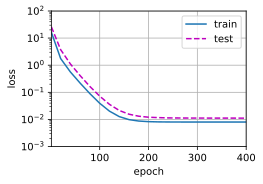

In [99]:
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

weight: [[3.6417542 3.4567971]]


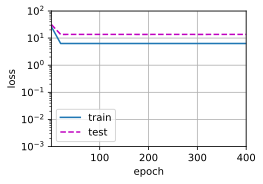

In [100]:
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

weight: [[ 4.9875073   1.2921447  -3.2363958   5.120098   -0.64005554  1.1266701
   0.68202037  0.7171443   0.12255266  0.37452975 -0.50844455 -0.2924325
  -0.52356565 -0.09100107 -0.03257049 -0.06911845  0.33346158 -0.20710987
  -0.24399948  0.21818507]]


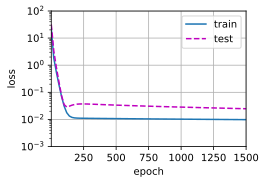

In [101]:
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)